# Task-1 : Project Planning - EDA & Stats

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import os 
import sys
sys.path.append(os.path.abspath("../scripts"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
# %%
os.chdir("..")  # Go up a directory
#print(os.getcwd())

In [3]:
from load_dataset import load_data

In [4]:
df = load_data("Data/MachineLearningRating_v3.txt")

✅ Loaded total 1000098 rows.


In [5]:
print("Shape:", df.shape)

Shape: (1000098, 52)


In [6]:
print("\nColumns:\n", df.columns.tolist())


Columns:
 ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


Data Understanding

In [7]:
print("\nData Types:\n", df.dtypes)


Data Types:
 UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                               obje

**Exploratory Data Analysis (EDA)**

To display all columns which has missing values

In [8]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDo

To display only the columns with missing values (i.e., NaN count greater than 0), modify your code like this:

In [9]:
missing_values = df.isnull().sum()
print("\nMissing Values (only where > 0):\n", missing_values[missing_values > 0])


Missing Values (only where > 0):
 Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


To count the number of columns that have missing values (i.e., at least one NaN

In [10]:
# Count of columns with missing values > 0
missing_counts = df.isnull().sum()
num_cols_with_missing = (missing_counts > 0).sum()

print("\nNumber of columns with missing values:", num_cols_with_missing)


Number of columns with missing values: 22


### # What is the overall Loss Ratio (TotalClaims / TotalPremium) for the portfolio? How does it vary by Province, VehicleType, and Gender?

In [11]:
# Ensure no division by zero
df = df[(df["TotalPremium"] > 0) & (df["TotalClaims"] >= 0)]

# Calculate Loss Ratio
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]

In [12]:
# 1. Overall Loss Ratio
overall_loss_ratio = df["LossRatio"].mean()
print("Overall Loss Ratio:", round(overall_loss_ratio, 4))

Overall Loss Ratio: 0.3501


In [13]:
# 2. Loss Ratio by Province
loss_by_province = df.groupby("Province")["LossRatio"].mean().sort_values(ascending=False)
print("\nLoss Ratio by Province:\n", loss_by_province)


Loss Ratio by Province:
 Province
Gauteng          0.429006
Mpumalanga       0.392698
Limpopo          0.348712
Western Cape     0.341917
North West       0.285348
KwaZulu-Natal    0.265328
Eastern Cape     0.235636
Northern Cape    0.203831
Free State       0.106209
Name: LossRatio, dtype: float64


In [14]:
# 3. Loss Ratio by VehicleType
loss_by_vehicle = df.groupby("VehicleType")["LossRatio"].mean().sort_values(ascending=False)
print("\n Loss Ratio by VehicleType:\n", loss_by_vehicle)


 Loss Ratio by VehicleType:
 VehicleType
Heavy Commercial     0.793617
Light Commercial     0.543917
Medium Commercial    0.493386
Passenger Vehicle    0.337584
Bus                  0.000000
Name: LossRatio, dtype: float64


In [15]:
# 4. Compute mean LossRatio by Gender
loss_by_gender = df.groupby("Gender")["LossRatio"].mean().sort_values(ascending=False)

# 1. Convert Series to DataFrame
loss_by_gender_df = loss_by_gender.reset_index()
loss_by_gender_df.columns = ["Gender", "Average Loss Ratio"]

# 2. Calculate percentage of Loss Ratio (e.g., 0.25 → 25.00%)
loss_by_gender_df["Loss Ratio (%)"] = (loss_by_gender_df["Average Loss Ratio"] * 100).round(2)

# 3. Optional: Round the average loss ratio column
loss_by_gender_df["Average Loss Ratio"] = loss_by_gender_df["Average Loss Ratio"].round(6)

# 4. Display the table
print("\n🔹 Loss Ratio by Gender (with Percentage):\n")
print(loss_by_gender_df.to_string(index=False))



🔹 Loss Ratio by Gender (with Percentage):

       Gender  Average Loss Ratio  Loss Ratio (%)
       Female            0.491979           49.20
         Male            0.353258           35.33
Not specified            0.347982           34.80


Visualization

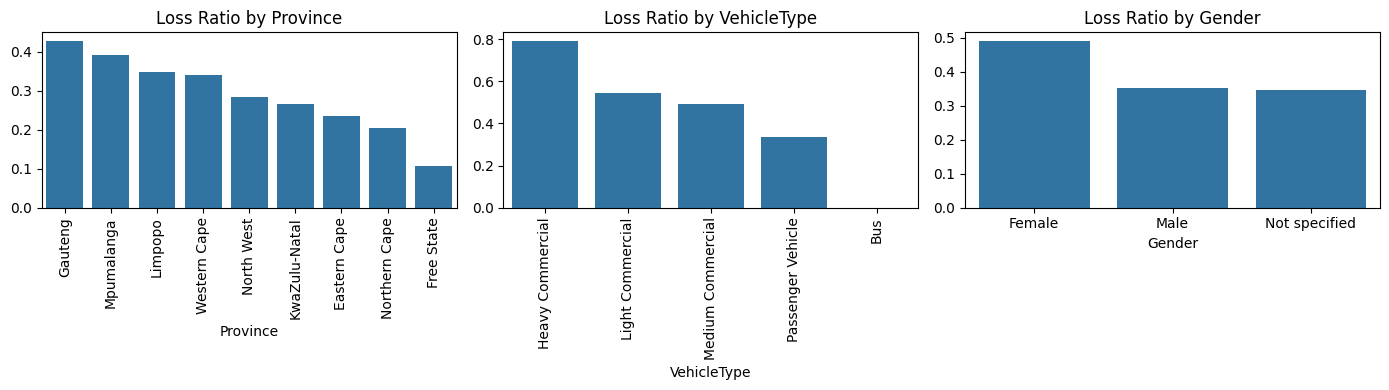

In [16]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
sns.barplot(x=loss_by_province.index, y=loss_by_province.values)
plt.xticks(rotation=90)
plt.title("Loss Ratio by Province")

plt.subplot(1, 3, 2)
sns.barplot(x=loss_by_vehicle.index, y=loss_by_vehicle.values)
plt.xticks(rotation=90)
plt.title("Loss Ratio by VehicleType")

plt.subplot(1, 3, 3)
sns.barplot(x=loss_by_gender.index, y=loss_by_gender.values)
plt.title("Loss Ratio by Gender")

plt.tight_layout()
plt.show()


### # What are the distributions of key financial variables? Are there outliers in TotalClaims or CustomValueEstimate that could skew our analysis?

Summary statistics

Summary statistics:

         TotalClaims  CustomValueEstimate
count  618174.000000         1.561000e+05
mean      100.442212         2.312563e+05
std      2989.936938         6.674016e+05
min         0.000000         2.000000e+04
25%         0.000000         1.356000e+05
50%         0.000000         2.200000e+05
75%         0.000000         2.800000e+05
max    393092.105263         2.655000e+07


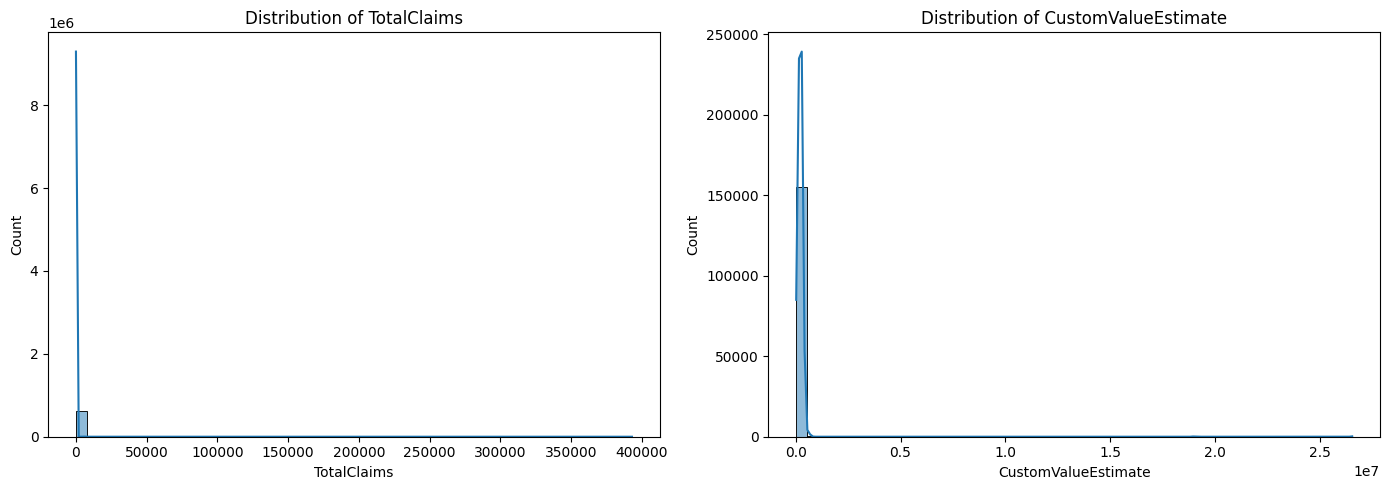

In [17]:
# Display summary stats for TotalClaims and CustomValueEstimate
print("Summary statistics:\n")
print(df[['TotalClaims', 'CustomValueEstimate']].describe())

# Histograms to visualize distribution
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['TotalClaims'], bins=50, kde=True)
plt.title('Distribution of TotalClaims')
plt.xlabel('TotalClaims')

plt.subplot(1, 2, 2)
sns.histplot(df['CustomValueEstimate'], bins=50, kde=True)
plt.title('Distribution of CustomValueEstimate')
plt.xlabel('CustomValueEstimate')

plt.tight_layout()
plt.show()

Boxplots to Check Outliers

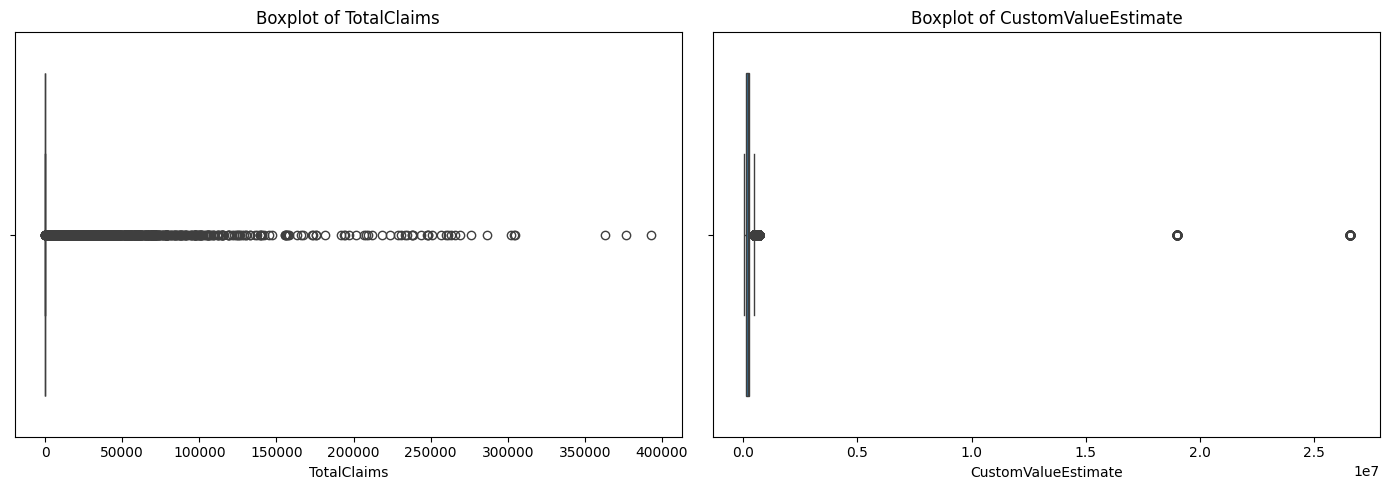

In [18]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['TotalClaims'])
plt.title('Boxplot of TotalClaims')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['CustomValueEstimate'])
plt.title('Boxplot of CustomValueEstimate')

plt.tight_layout()
plt.show()

### # Are there temporal trends? Did the claim frequency or severity change over the 18-month period?

In [19]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

In [20]:
# Create a flag for claim occurrence
df['ClaimOccurred'] = df['TotalClaims'] > 0

# Group by month
monthly_stats = df.groupby('TransactionMonth').agg(
    total_policies = ('PolicyID', 'count'),
    claims_count = ('ClaimOccurred', 'sum'),
    avg_claim_amount = ('TotalClaims', lambda x: x[x > 0].mean())
).reset_index()

# Claim frequency: claims_count / total_policies
monthly_stats['claim_frequency'] = monthly_stats['claims_count'] / monthly_stats['total_policies']

Plot the trend

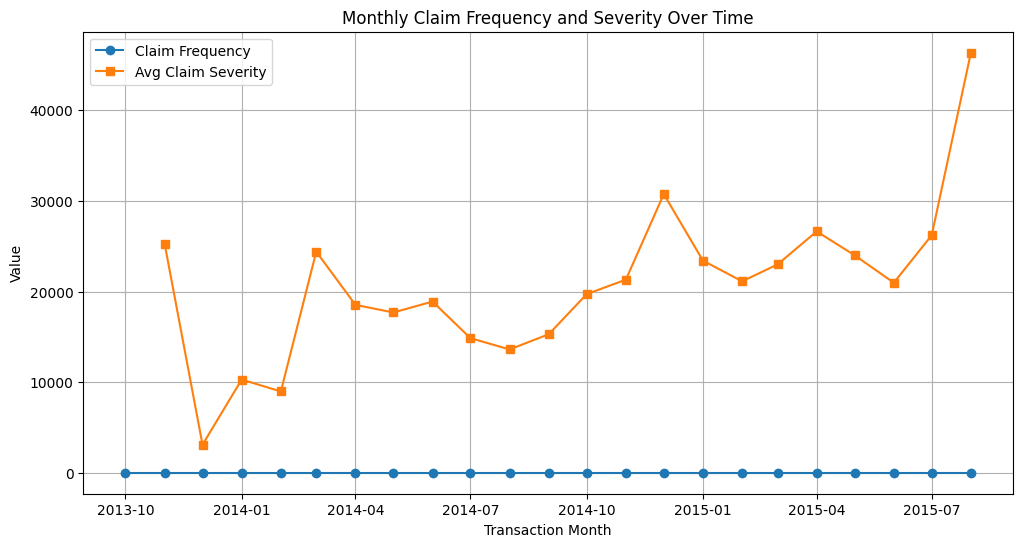

In [21]:
plt.figure(figsize=(12, 6))

plt.plot(monthly_stats['TransactionMonth'], monthly_stats['claim_frequency'], marker='o', label='Claim Frequency')
plt.plot(monthly_stats['TransactionMonth'], monthly_stats['avg_claim_amount'], marker='s', label='Avg Claim Severity')

plt.title('Monthly Claim Frequency and Severity Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Which vehicle makes/models are associated with the highest and lowest claim amounts?

In [22]:
# Average claim amount by vehicle make
avg_claim_by_make = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False)

# Average claim amount by vehicle model
avg_claim_by_model = df.groupby('Model')['TotalClaims'].mean().sort_values(ascending=False)

In [23]:
# Top 10 makes with highest average claims
print("Top 10 Vehicle Makes by Average Claim Amount:")
print(avg_claim_by_make.head(10))

# Bottom 10 makes with lowest average claims
print("\nBottom 10 Vehicle Makes by Average Claim Amount:")
print(avg_claim_by_make.tail(10))

# Top 10 models with highest average claims
print("\nTop 10 Vehicle Models by Average Claim Amount:")
print(avg_claim_by_model.head(10))

# Bottom 10 models with lowest average claims
print("\nBottom 10 Vehicle Models by Average Claim Amount:")
print(avg_claim_by_model.tail(10))

Top 10 Vehicle Makes by Average Claim Amount:
make
SUZUKI                                 695.130857
JMC                                    575.054386
HYUNDAI                                376.189161
AUDI                                   272.746885
POLARSUN                               230.992331
B.A.W                                  206.128840
BMW                                    196.075071
IVECO                                  150.970132
GOLDEN JOURNEY                         143.814321
MERCEDES-BENZ                          133.569645
Name: TotalClaims, dtype: float64

Bottom 10 Vehicle Makes by Average Claim Amount:
make
HINO                                   0.0
JINBEI                                 0.0
MARCOPOLO                              0.0
PROTON                                 0.0
PEUGEOT                                0.0
OPEL                                   0.0
RENAULT                                0.0
SCANIA                                 0.0
TATA            

# Statistical thinking

In [24]:
df['Province'].head(10000)

0             Gauteng
1             Gauteng
3             Gauteng
5             Gauteng
6             Gauteng
             ...     
14964    Eastern Cape
14965    Eastern Cape
14966    Eastern Cape
14967    Eastern Cape
14968    Eastern Cape
Name: Province, Length: 10000, dtype: object

In [25]:
from scipy.stats import ttest_ind

# Compare Loss Ratio between two provinces
province1 = df[df['Province'] == 'Gauteng']['LossRatio'].dropna()
province2 = df[df['Province'] == 'Eastern Cape']['LossRatio'].dropna()

t_stat, p_value = ttest_ind(province1, province2, equal_var=False)
print(f"T-test result: t = {t_stat:.3f}, p = {p_value:.3f}")

if p_value < 0.05:
    print("Significant difference in loss ratio between provinces")
else:
    print("No significant difference in loss ratio between provinces")

T-test result: t = 3.773, p = 0.000
Significant difference in loss ratio between provinces


## Perform Exploratory Data Analysis (EDA) analysis on the following

Data Summarization

In [26]:
# Descriptive Statistics: Calculate the variability for numerical features such as TotalPremium, TotalClaim, etc.
# List numerical columns to analyze variability for
num_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']

# Calculate variability statistics
variability_stats = pd.DataFrame()

for col in num_cols:
    variance = df[col].var()
    std_dev = df[col].std()
    data_range = df[col].max() - df[col].min()
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    
    variability_stats[col] = [variance, std_dev, data_range, iqr]

variability_stats.index = ['Variance', 'Std Deviation', 'Range', 'IQR']

print(variability_stats.T)  # Transpose for easier reading

                         Variance  Std Deviation         Range            IQR
TotalPremium         8.193053e+04     286.235103  6.528260e+04      76.316053
TotalClaims          8.939723e+06    2989.936938  3.930921e+05       0.000000
CustomValueEstimate  4.454249e+11  667401.637630  2.653000e+07  144400.000000


In [ ]:
# Data Structure: Review the dtype of each column to confirm if categorical variables, dates, etc. are properly formatted.
# Convert appropriate columns to category dtype
categorical_cols = ['Gender', 'Province', 'VehicleType', 'Bank', 'CoverCategory', 'CoverType']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Convert date columns to datetime
date_cols = ['TransactionMonth']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Check data types again to confirm
print(df.dtypes)

UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                              category
AccountType                         object
MaritalStatus                       object
Gender                            category
Country                             object
Province                          category
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                       category
RegistrationYear                     int64
make                                object
Model                               object
Cylinders  

Data Quality Assessment

In [28]:
# Count missing values per column
missing_counts = df.isnull().sum()

# Filter columns with missing values only
missing_counts = missing_counts[missing_counts > 0]

print("Columns with missing values and their counts:")
print(missing_counts)

Columns with missing values and their counts:
Bank                        82536
AccountType                 30734
MaritalStatus                5071
Gender                       4621
mmcode                        218
VehicleType                   218
make                          218
Model                         218
Cylinders                     218
cubiccapacity                 218
kilowatts                     218
bodytype                      218
NumberOfDoors                 218
VehicleIntroDate              218
CustomValueEstimate        462074
CapitalOutstanding              2
NewVehicle                  60633
WrittenOff                 378870
Rebuilt                    378870
Converted                  378870
CrossBorder                617920
NumberOfVehiclesInFleet    618174
dtype: int64


In [29]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]

print("Columns with missing values (%):")
print(missing_percentage)

Columns with missing values (%):
Bank                        13.351581
AccountType                  4.971739
MaritalStatus                0.820319
Gender                       0.747524
mmcode                       0.035265
VehicleType                  0.035265
make                         0.035265
Model                        0.035265
Cylinders                    0.035265
cubiccapacity                0.035265
kilowatts                    0.035265
bodytype                     0.035265
NumberOfDoors                0.035265
VehicleIntroDate             0.035265
CustomValueEstimate         74.748210
CapitalOutstanding           0.000324
NewVehicle                   9.808403
WrittenOff                  61.288569
Rebuilt                     61.288569
Converted                   61.288569
CrossBorder                 99.958911
NumberOfVehiclesInFleet    100.000000
dtype: float64


Bivariate or Multivariate Analysis:

In [31]:
# Correlations and Associations: Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of ZipCode, using scatter plots and correlation matrices
# Ensure TransactionMonth is datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Aggregate by PostalCode and TransactionMonth (sum or mean)
monthly_agg = df.groupby(['PostalCode', 'TransactionMonth'])[['TotalPremium', 'TotalClaims']].sum().reset_index()

# Sort values
monthly_agg = monthly_agg.sort_values(['PostalCode', 'TransactionMonth'])

In [32]:
# Calculate monthly % change for TotalPremium and TotalClaims per PostalCode
monthly_agg['Premium_pct_change'] = monthly_agg.groupby('PostalCode')['TotalPremium'].pct_change()
monthly_agg['Claims_pct_change'] = monthly_agg.groupby('PostalCode')['TotalClaims'].pct_change()

# Drop NA values created by pct_change (first month per postal code)
monthly_agg_clean = monthly_agg.dropna(subset=['Premium_pct_change', 'Claims_pct_change'])

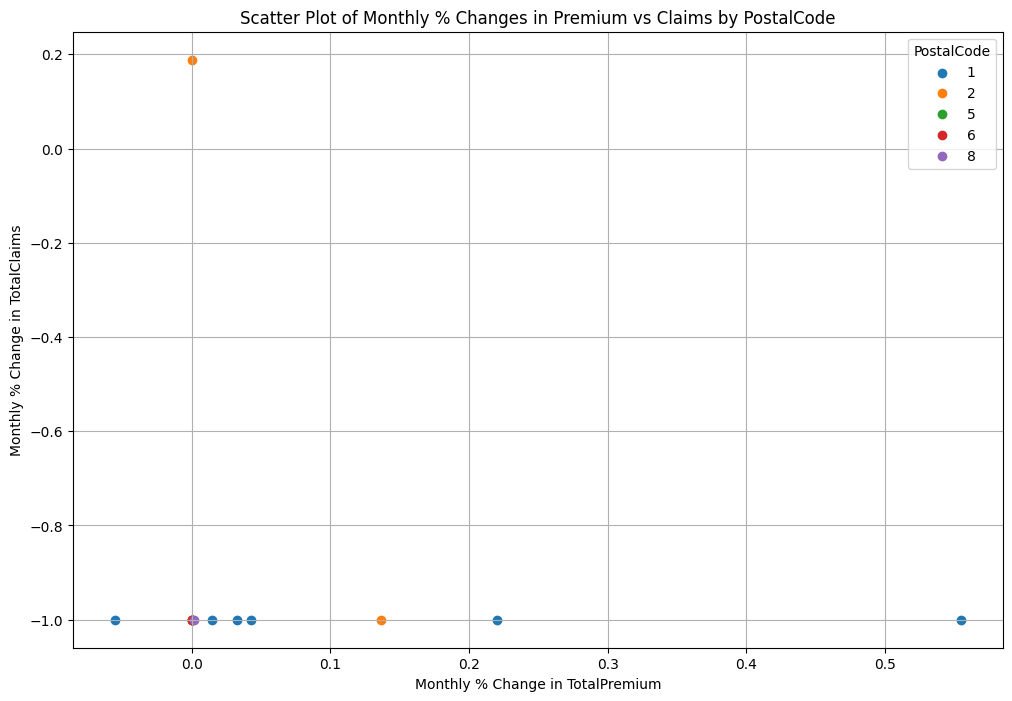

In [33]:
# Select few sample postal codes for clearer visualization
sample_zipcodes = monthly_agg_clean['PostalCode'].unique()[:5]  # pick first 5 postal codes

plt.figure(figsize=(12, 8))
for zipcode in sample_zipcodes:
    subset = monthly_agg_clean[monthly_agg_clean['PostalCode'] == zipcode]
    plt.scatter(subset['Premium_pct_change'], subset['Claims_pct_change'], label=str(zipcode))

plt.xlabel('Monthly % Change in TotalPremium')
plt.ylabel('Monthly % Change in TotalClaims')
plt.title('Scatter Plot of Monthly % Changes in Premium vs Claims by PostalCode')
plt.legend(title='PostalCode')
plt.grid(True)
plt.show()

In [34]:
correlations = {}

for zipcode, group in monthly_agg_clean.groupby('PostalCode'):
    corr = group[['Premium_pct_change', 'Claims_pct_change']].corr().iloc[0, 1]
    correlations[zipcode] = corr

# Convert to DataFrame for easier viewing
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
corr_df = corr_df.sort_values(by='Correlation', ascending=False)

print(corr_df.head(10))  # Top 10 postal codes with highest correlation

      Correlation
4027     1.000000
305      1.000000
1862     1.000000
7550     1.000000
2840     1.000000
2001     1.000000
1401     1.000000
1618     1.000000
1739     0.999198
200      0.995260


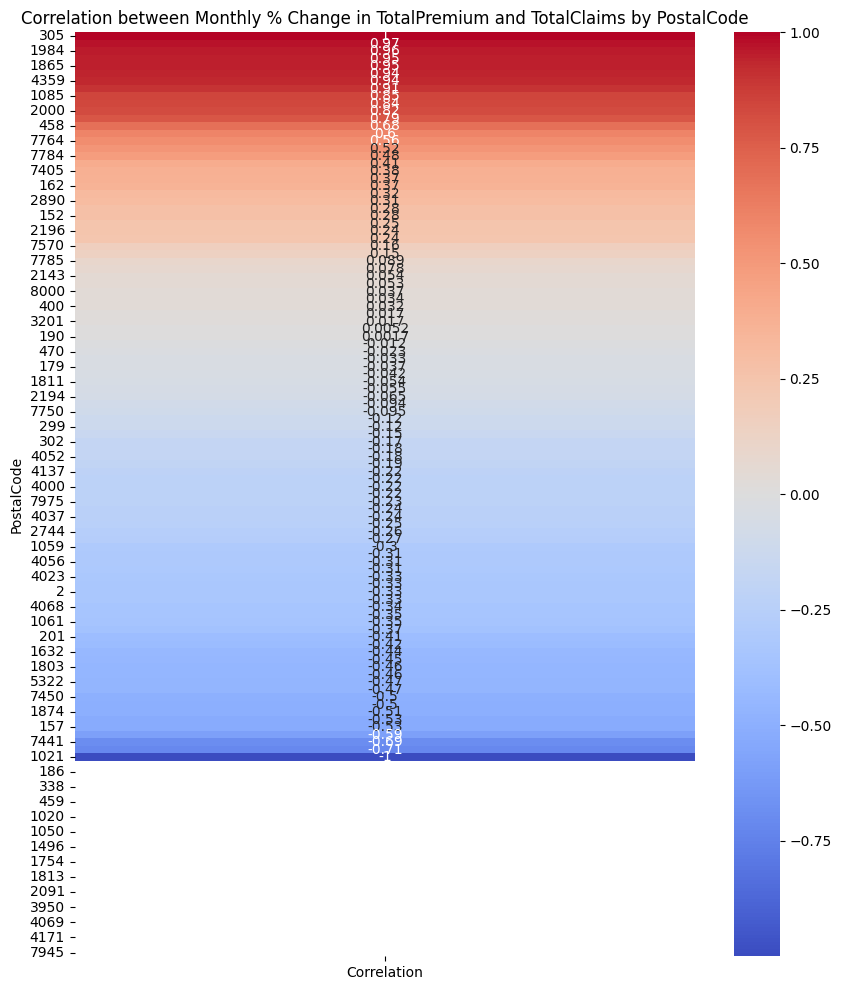

In [35]:
# Filter postal codes with enough data points
postal_codes_with_enough_data = monthly_agg_clean.groupby('PostalCode').filter(lambda x: len(x) >= 6)['PostalCode'].unique()

corr_list = []
for zipcode in postal_codes_with_enough_data:
    group = monthly_agg_clean[monthly_agg_clean['PostalCode'] == zipcode]
    corr_val = group[['Premium_pct_change', 'Claims_pct_change']].corr().iloc[0, 1]
    corr_list.append({'PostalCode': zipcode, 'Correlation': corr_val})

corr_matrix = pd.DataFrame(corr_list)


# Plot heatmap sorted by correlation
corr_matrix_sorted = corr_matrix.sort_values(by='Correlation', ascending=False).set_index('PostalCode')

plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix_sorted, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation between Monthly % Change in TotalPremium and TotalClaims by PostalCode')
plt.show()

Data Comparison

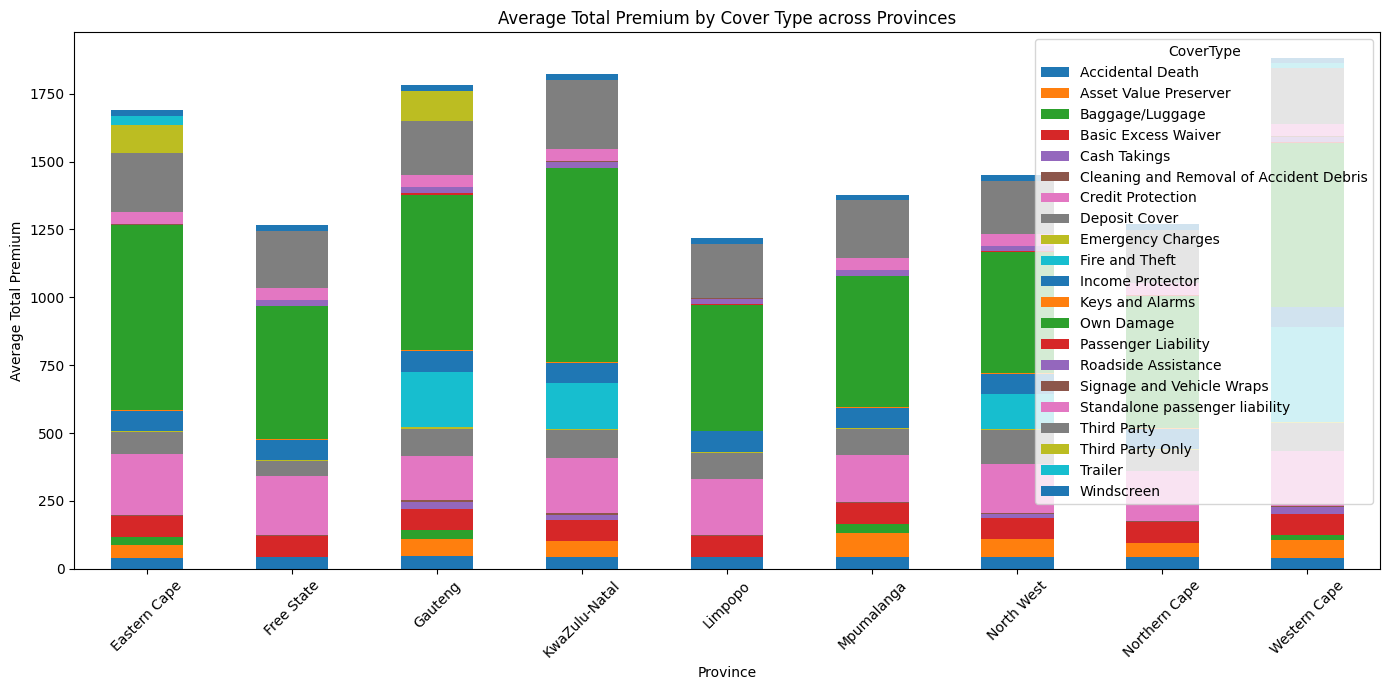

In [36]:
# Example: Group by Province and CoverType to get average premium
province_cover = df.groupby(['Province', 'CoverType'])['TotalPremium'].mean().reset_index()

# Pivot for easier plotting
province_cover_pivot = province_cover.pivot(index='Province', columns='CoverType', values='TotalPremium').fillna(0)

# Plot average premium by cover type across provinces
province_cover_pivot.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Average Total Premium by Cover Type across Provinces')
plt.ylabel('Average Total Premium')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

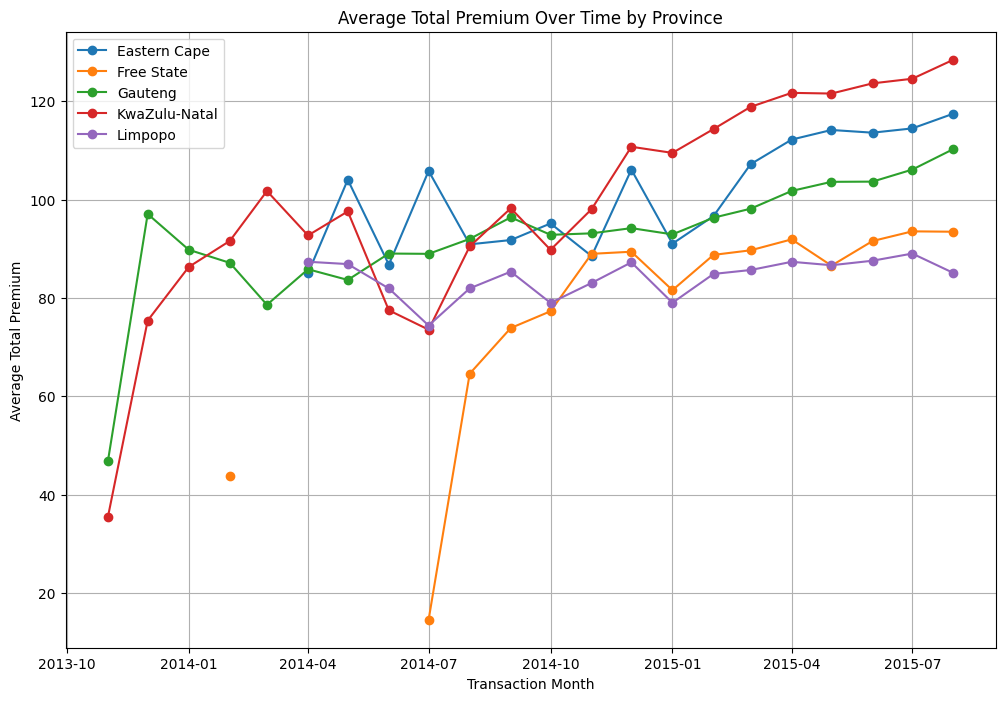

In [37]:
# Convert TransactionMonth to datetime if not done
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Example: Average premium over time by Province
time_province = df.groupby([df['TransactionMonth'].dt.to_period('M'), 'Province'])['TotalPremium'].mean().reset_index()
time_province['TransactionMonth'] = time_province['TransactionMonth'].dt.to_timestamp()

# Plot trend for a few provinces
sample_provinces = time_province['Province'].unique()[:5]  # take 5 provinces for clarity

plt.figure(figsize=(12,8))
for prov in sample_provinces:
    subset = time_province[time_province['Province'] == prov]
    plt.plot(subset['TransactionMonth'], subset['TotalPremium'], marker='o', label=prov)

plt.title('Average Total Premium Over Time by Province')
plt.xlabel('Transaction Month')
plt.ylabel('Average Total Premium')
plt.legend()
plt.grid(True)
plt.show()

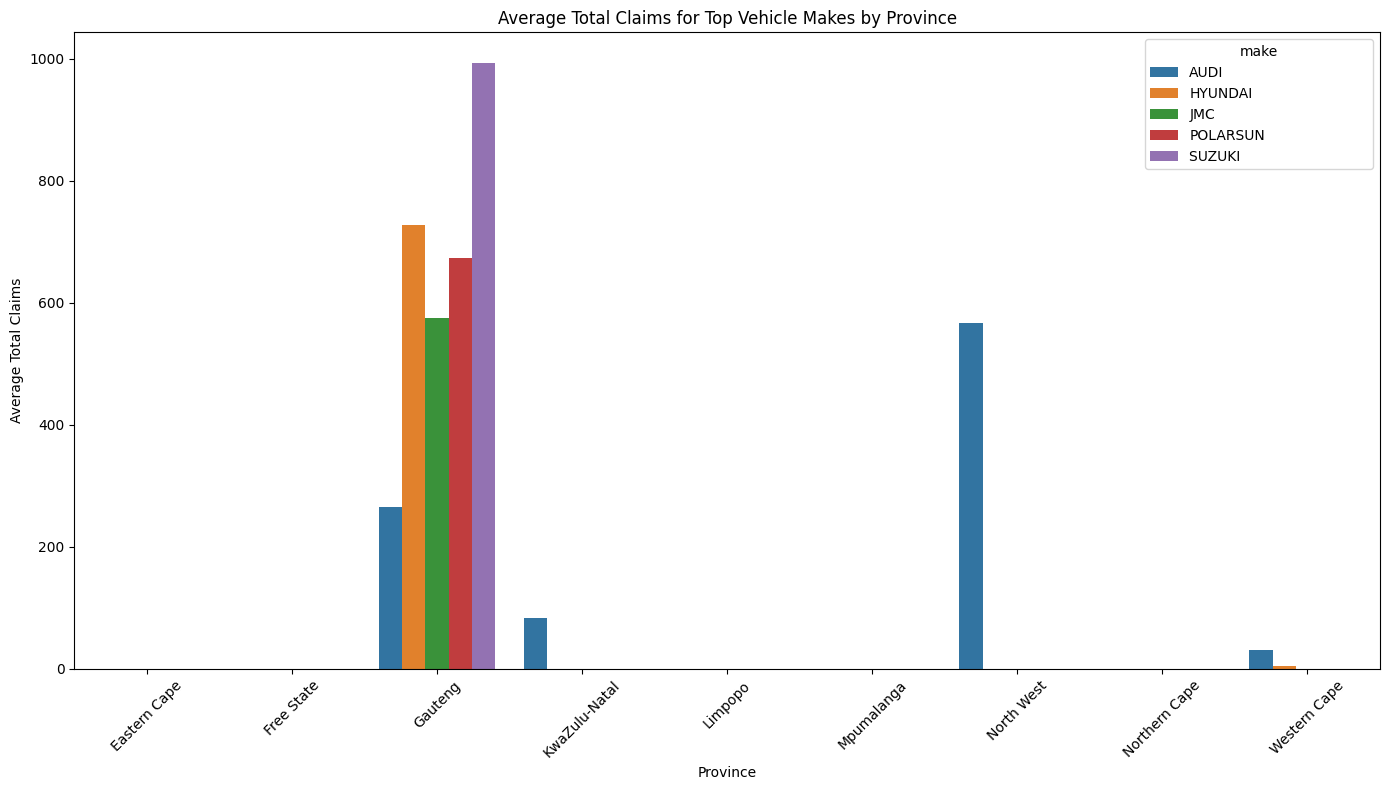

In [38]:
# Top 5 vehicle makes by average claims amount per province
top_makes = df.groupby(['Province', 'make'])['TotalClaims'].mean().reset_index()

# For example, filter top makes overall
top_makes_overall = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False).head(5).index.tolist()

top_makes_filtered = top_makes[top_makes['make'].isin(top_makes_overall)]

plt.figure(figsize=(14,8))
sns.barplot(data=top_makes_filtered, x='Province', y='TotalClaims', hue='make')
plt.title('Average Total Claims for Top Vehicle Makes by Province')
plt.xticks(rotation=45)
plt.ylabel('Average Total Claims')
plt.tight_layout()
plt.show()


Outlier Detection

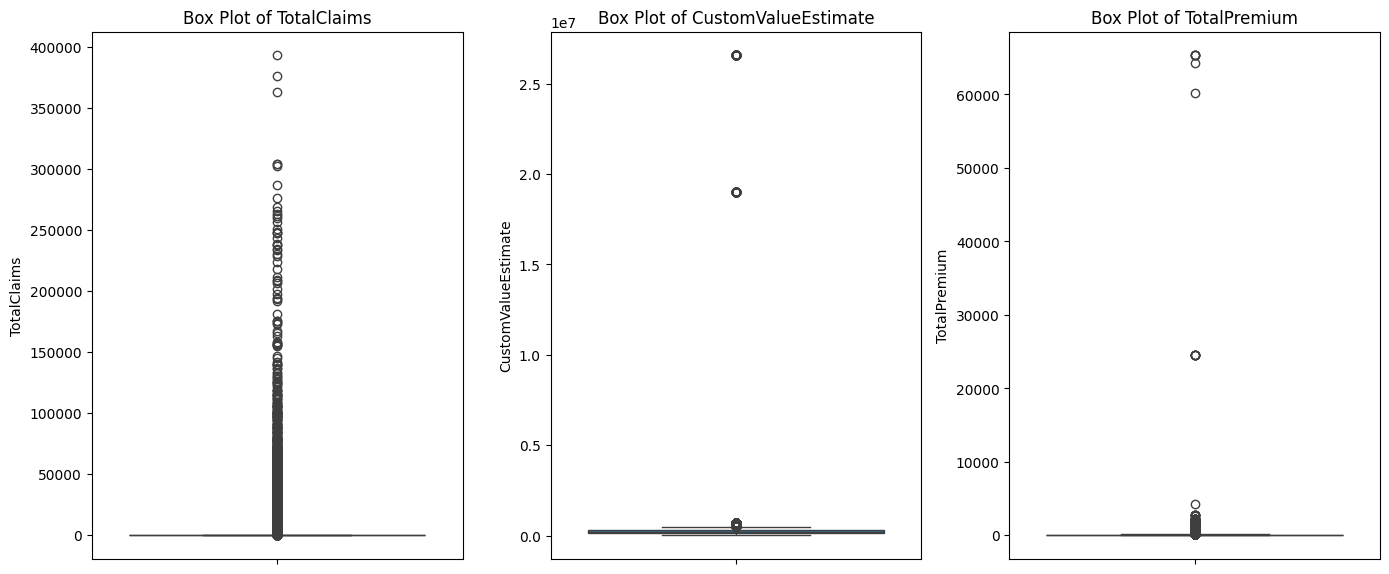

In [39]:
# List of numerical columns to check for outliers
num_cols = ['TotalClaims', 'CustomValueEstimate', 'TotalPremium']

plt.figure(figsize=(14, 6))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [40]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {outliers.shape[0]}")
    return outliers

outliers_claims = detect_outliers_iqr(df, 'TotalClaims')
outliers_custom_val = detect_outliers_iqr(df, 'CustomValueEstimate')

Number of outliers in TotalClaims: 2641
Number of outliers in CustomValueEstimate: 1436


Visualization

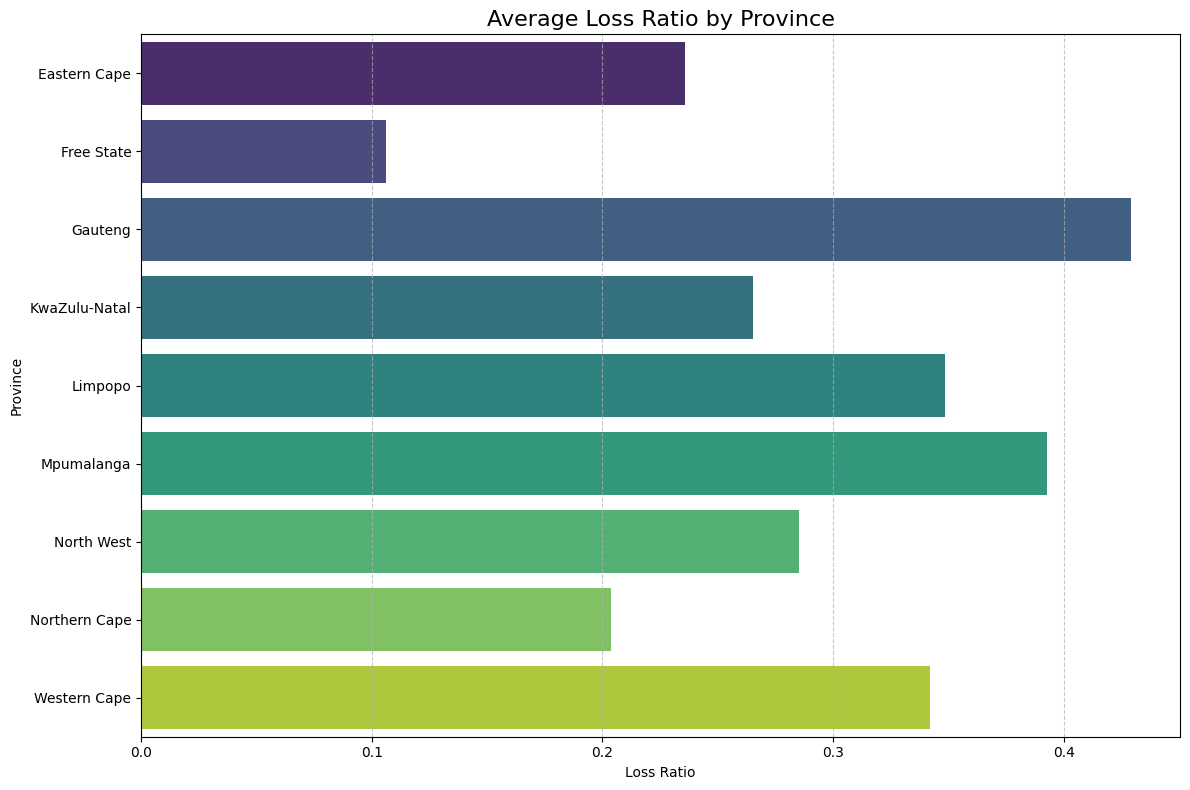

In [41]:
# Loss Ratio by Province (Horizontal Bar Plot with Color Gradient)
plt.figure(figsize=(12,8))
loss_by_province = df.groupby("Province")["LossRatio"].mean().sort_values(ascending=True)

sns.barplot(x=loss_by_province.values, y=loss_by_province.index, palette="viridis")
plt.title("Average Loss Ratio by Province", fontsize=16)
plt.xlabel("Loss Ratio")
plt.ylabel("Province")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

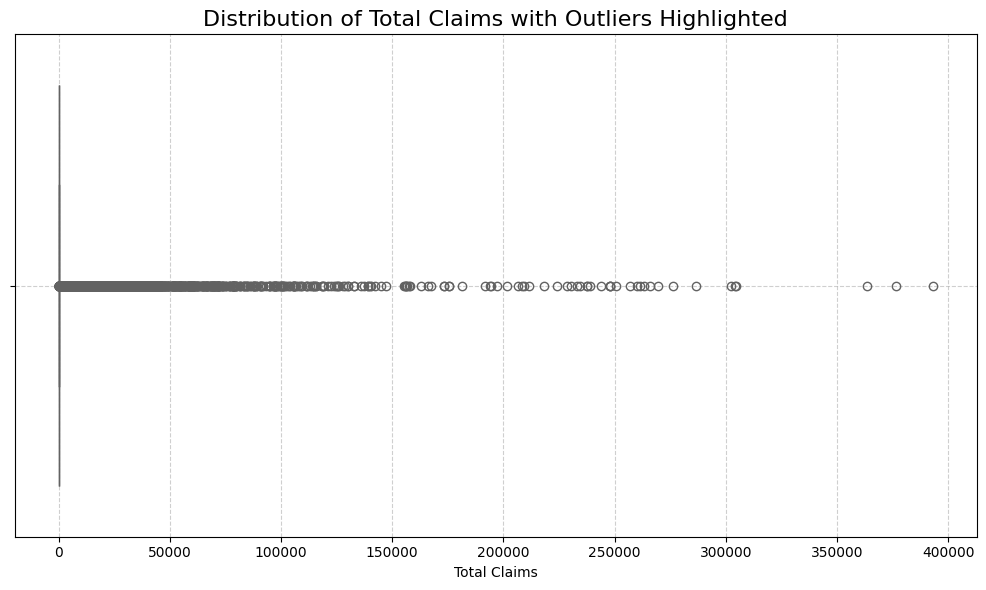

In [42]:
# Box Plot for TotalClaims Showing Outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['TotalClaims'], color="tomato")
plt.title("Distribution of Total Claims with Outliers Highlighted", fontsize=16)
plt.xlabel("Total Claims")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

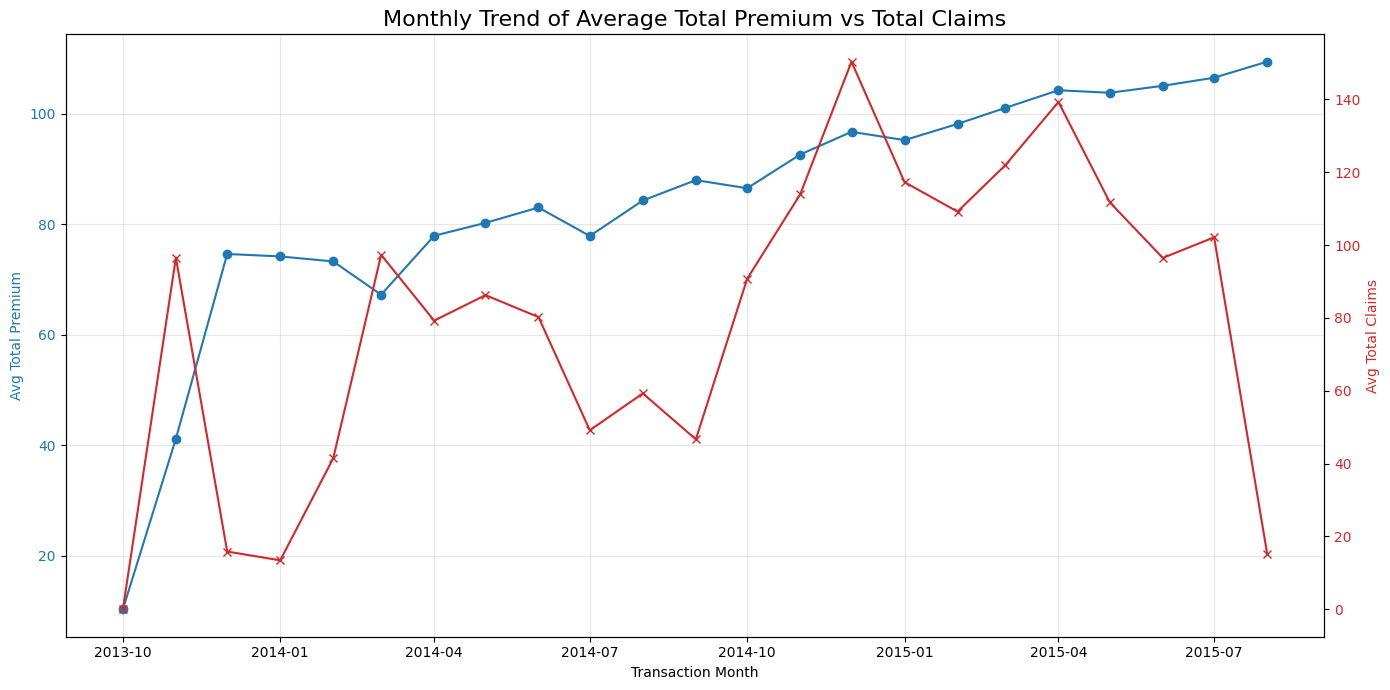

In [43]:
# Monthly Trend of Average Total Premium vs Total Claims (Dual-axis Line Plot)
# Make sure TransactionMonth is datetime type
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

monthly_summary = df.groupby('TransactionMonth').agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'mean'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(14,7))

color = 'tab:blue'
ax1.set_xlabel('Transaction Month')
ax1.set_ylabel('Avg Total Premium', color=color)
ax1.plot(monthly_summary['TransactionMonth'], monthly_summary['TotalPremium'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(alpha=0.3)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Avg Total Claims', color=color)
ax2.plot(monthly_summary['TransactionMonth'], monthly_summary['TotalClaims'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monthly Trend of Average Total Premium vs Total Claims', fontsize=16)
fig.tight_layout()
plt.show()